In [1]:
import numpy as np
import matplotlib.pyplot as plt
import os
import cv2

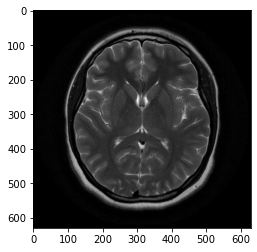

In [2]:
DATADIR = r"C:\Users\govin\Desktop\Dataset\BrainTumorYesNo Data"
CATEGORIES = ['no', 'yes']
for category in CATEGORIES: 
    path = os.path.join(DATADIR, category)  # path to cats or dog dir
    for img in os.listdir(path):
        img_array = cv2.imread(os.path.join(path,img), cv2.IMREAD_GRAYSCALE)
        plt.imshow(img_array, cmap = 'gray')
        plt.show()
        break
    break    

In [3]:
print(img_array)

[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


In [4]:
print(img_array.shape)

(630, 630)


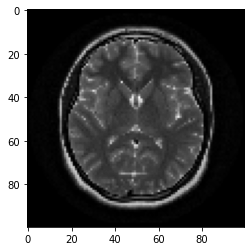

In [5]:
IMG_SIZE = 100

new_array = cv2.resize(img_array, (IMG_SIZE, IMG_SIZE))
plt.imshow(new_array, cmap = 'gray')
plt.show()

In [6]:
training_data = []

def create_training_data():    
    for category in CATEGORIES:
        path = os.path.join(DATADIR, category)  # path to cats or dog dir
        class_num = CATEGORIES.index(category)
        for img in os.listdir(path):
            try:
                img_array = cv2.imread(os.path.join(path,img), cv2.IMREAD_GRAYSCALE)
                new_array = cv2.resize(img_array, (IMG_SIZE,IMG_SIZE))
                training_data.append([new_array, class_num])
            except Exception as e:
                pass
            
create_training_data()            
               

In [7]:
print(len(training_data))

253


In [11]:
import random

random.shuffle(training_data)

In [14]:
for sample in training_data:
    print(sample[0])

[[  1   1   1 ...   1   1   1]
 [  1   1   1 ...   1   1   1]
 [  1   1   1 ...   1   1   1]
 ...
 [156  34   6 ...   1   1   1]
 [  2   4   5 ...   1   0   0]
 [  0   1   2 ...   4   3   3]]
[[1 1 1 ... 1 1 1]
 [1 1 1 ... 1 1 1]
 [1 1 1 ... 1 1 1]
 ...
 [1 1 1 ... 1 1 1]
 [1 1 1 ... 1 1 1]
 [1 1 1 ... 1 1 1]]
[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]
[[253   3   0 ...   4  16  29]
 [253   3   0 ...   3  15  28]
 [254   5   0 ...   2  15  27]
 ...
 [246   4  11 ...   3  13  24]
 [254   8   4 ...   3  16  28]
 [ 21  22  21 ...  26  28  29]]
[[  2   2   2 ...   2   2   2]
 [  2   2   2 ...   2   2   2]
 [  2   3   4 ...   2   2   2]
 ...
 [163  79 115 ...   2   2   2]
 [  9  10   5 ...   2   2   2]
 [  2   2   2 ...   2   2   2]]
[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]
[[16 16 16 ... 16 16 16]
 [16 16 16 ... 16 16 16]
 [16 16 16 ...

In [60]:
for sample in training_data:
    print(sample[1])

1
1
0
1
1
0
0
1
1
1
0
0
1
1
0
1
1
1
1
1
1
1
0
0
0
1
0
1
1
0
1
0
0
0
0
1
1
1
0
1
0
1
0
1
0
0
0
1
1
0
0
0
1
0
1
1
0
1
1
1
1
1
0
1
1
0
0
1
0
1
1
0
0
0
0
1
0
0
0
1
1
1
0
1
0
0
0
0
1
0
0
1
1
1
1
1
1
1
1
1
0
0
1
1
0
0
1
0
1
0
1
0
0
0
1
1
0
1
1
1
1
1
1
1
1
0
1
1
0
1
0
0
1
1
1
1
1
0
1
1
0
1
1
1
1
1
1
0
0
0
1
1
1
1
1
0
0
1
1
1
0
0
0
1
0
0
1
1
0
1
1
0
1
1
1
1
1
1
1
1
1
0
1
0
1
1
0
0
1
1
1
1
0
1
0
1
0
1
1
1
0
1
1
0
1
1
1
1
0
1
1
1
0
1
0
1
0
0
1
1
1
0
1
0
0
0
0
1
1
0
1
0
1
1
1
0
1
0
0
1
1
1
0
1
0
1
1
1
1
1
1
1
1


In [61]:
X = []
y = []

In [62]:
for features, label in training_data:
    X.append(features)
    y.append(label)
    
X = np.array(X).reshape(-1, IMG_SIZE, IMG_SIZE, 1)    

In [63]:
import pickle

pickle_out = open('X.pickle', 'wb')
pickle.dump(X, pickle_out)
pickle_out.close()

pickle_out = open('y.pickle', 'wb')
pickle.dump(y, pickle_out)
pickle_out.close()

In [64]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Activation, Conv2D, Flatten, MaxPooling2D

In [65]:
X = pickle.load(open('X.pickle', 'rb'))
y = pickle.load(open('y.pickle', 'rb'))

In [66]:
X = X/255.0  # scale

In [67]:
X

array([[[[0.00392157],
         [0.00392157],
         [0.00392157],
         ...,
         [0.00392157],
         [0.00392157],
         [0.00392157]],

        [[0.00392157],
         [0.00392157],
         [0.00392157],
         ...,
         [0.00392157],
         [0.00392157],
         [0.00392157]],

        [[0.00392157],
         [0.00392157],
         [0.00392157],
         ...,
         [0.00392157],
         [0.00392157],
         [0.00392157]],

        ...,

        [[0.61176471],
         [0.13333333],
         [0.02352941],
         ...,
         [0.00392157],
         [0.00392157],
         [0.00392157]],

        [[0.00784314],
         [0.01568627],
         [0.01960784],
         ...,
         [0.00392157],
         [0.        ],
         [0.        ]],

        [[0.        ],
         [0.00392157],
         [0.00784314],
         ...,
         [0.01568627],
         [0.01176471],
         [0.01176471]]],


       [[[0.00392157],
         [0.00392157],
         [0.00

In [68]:
# Build the model
model = Sequential()

model.add(Conv2D(64, (3,3), input_shape = X.shape[1:]))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size = (2,2)))

model.add(Conv2D(64, (3,3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size = (2,2)))

model.add(Flatten())
model.add(Dense(64))

model.add(Dense(1))
model.add(Activation('sigmoid'))

model.compile(loss = 'binary_crossentropy', optimizer = 'adam', metrics = ['accuracy'])



In [70]:
y = np.array(y)  # X, y both should be array

In [73]:
model.fit(X, y,  epochs = 5, batch_size = 32, validation_split = 0.1)

Epoch 1/5
8/8 [==============================] - 3s 374ms/step - loss: 0.2024 - accuracy: 0.9339 - val_loss: 0.2165 - val_accuracy: 0.9231
Epoch 2/5
8/8 [==============================] - 3s 352ms/step - loss: 0.1356 - accuracy: 0.9604 - val_loss: 0.0921 - val_accuracy: 1.0000
Epoch 3/5
8/8 [==============================] - 3s 338ms/step - loss: 0.1683 - accuracy: 0.9295 - val_loss: 0.1402 - val_accuracy: 0.9615
Epoch 4/5
8/8 [==============================] - 3s 346ms/step - loss: 0.1745 - accuracy: 0.9383 - val_loss: 0.4275 - val_accuracy: 0.7692
Epoch 5/5
8/8 [==============================] - 3s 352ms/step - loss: 0.1344 - accuracy: 0.9780 - val_loss: 0.1187 - val_accuracy: 0.9615
